In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# -- Init Variables --
init_folder='/home/traaffneu/margal/awake_code/awake/assets'
output_folder = '/home/traaffneu/margal/awake_code/awake/scratch/plots/fig1_population/'

# -- Create Dataframe from metadata 
metadata_path ='/home/traaffneu/margal/awake_code/awake/scripts/tables/Awake_metadata.tsv'
df = pd.read_csv(metadata_path, sep='\t')

metadata = pd.concat([df['rodent.sex'].value_counts(sort=False),
                    df['rodent.strain'].value_counts(sort=False), 
                    df['rodent.species'].value_counts(sort=False), 
                    df['head-plate (y/n)'].value_counts(sort=False), 
                    df['body.restrained (y/n)'].value_counts(sort=False), 
                    df['anesthesia.before.acquisition'].value_counts(sort=False),
                    df['MRI.field.strength'].value_counts(sort=False)], axis=1)

metadata = metadata/metadata.sum()*100
metadata.columns = ["Sex", "Strain", "Species", "Head Plate", "Body Restrained", "Anesthesia Before Acquisition", "MRI Field Strength"] #rename columns of df
#metadata = metadata.fillna(0)

print(metadata)

                      Sex     Strain    Species  Head Plate  Body Restrained  \
m               86.021505        NaN        NaN         NaN              NaN   
f               13.978495        NaN        NaN         NaN              NaN   
C57BL/6               NaN  51.612903        NaN         NaN              NaN   
Wistar                NaN  27.956989        NaN         NaN              NaN   
Sprague-Dawley        NaN  20.430108        NaN         NaN              NaN   
mouse                 NaN        NaN  42.477876         NaN              NaN   
rat                   NaN        NaN  57.522124         NaN              NaN   
y                     NaN        NaN        NaN   64.516129        87.096774   
n                     NaN        NaN        NaN   35.483871        12.903226   
Isoflurane            NaN        NaN        NaN         NaN              NaN   
Sevoflurane           NaN        NaN        NaN         NaN              NaN   
9.4                   NaN        NaN    

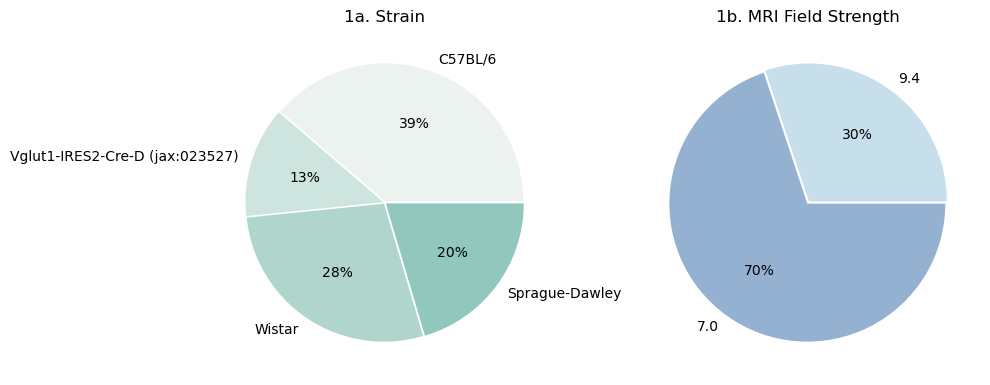

In [31]:
# -- Fig1.a + b: strain + field strength 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Create 2 subplots

# Plot 1: Strain
sns.set_palette(sns.color_palette('light:#5A9', n_colors=6))
filtered_data = metadata[metadata['Strain'].notna()]['Strain']
num_wedges = len(filtered_data)
explode = [0.01] * num_wedges
ax1 = filtered_data.plot.pie(title='1a. Strain', autopct="%.f%%", explode=explode, ax=axes[0])
ax1.set(xlabel="", ylabel="")

# Plot 2: MRI Field Strength
sns.set_palette(sns.color_palette('ch:s=.25,rot=-.25', n_colors=5))
filtered_data = metadata[metadata['MRI Field Strength'].notna()]['MRI Field Strength']
num_wedges = len(filtered_data)
explode = [0.01] * num_wedges
ax2 = filtered_data.plot.pie(title='1b. MRI Field Strength', autopct="%.f%%", explode=explode, ax=axes[1])
ax2.set(xlabel="", ylabel="")

# Adjust layout and spacing
plt.tight_layout()

# Save the plot as SVG
plt.savefig('/project/4180000.36/AwakeRodent/scratch/plots/fig1_population/pies.svg', format='svg', dpi=1200)
plt.show()


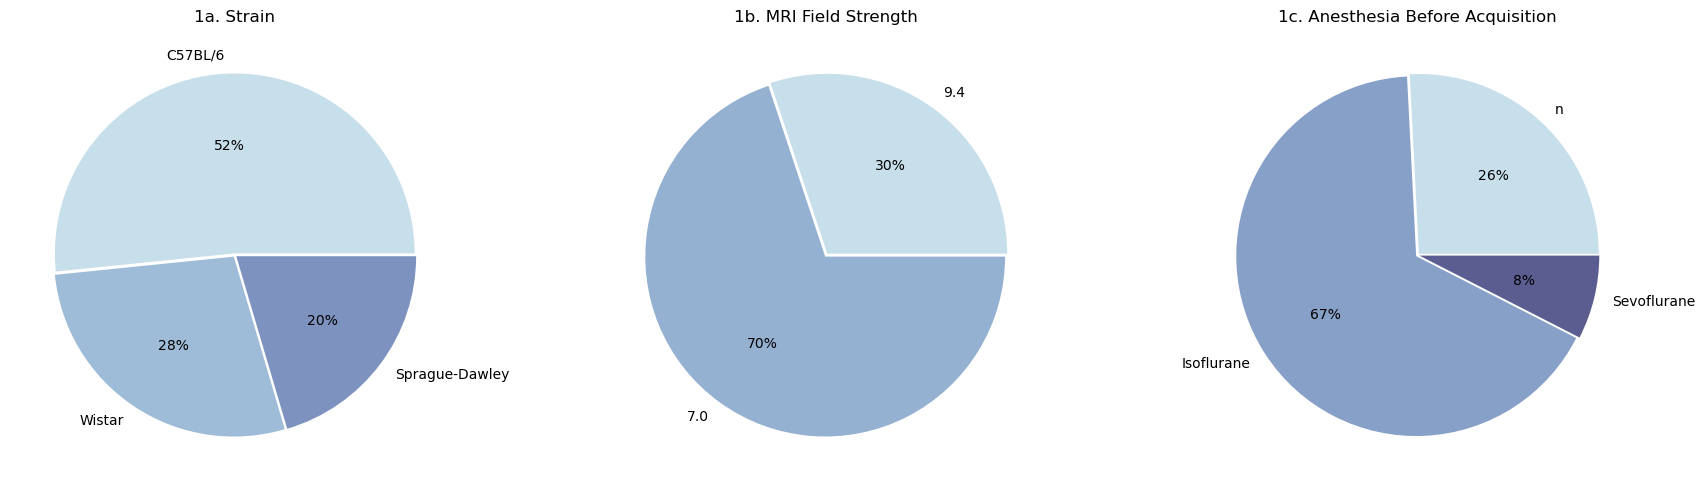

In [4]:
# -- Fig1.a + b: strain + field strength 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))  # Create 2 subplots

# Plot 1: Strain
sns.set_palette(sns.color_palette('ch:s=.25,rot=-.25', n_colors=6))
filtered_data = metadata[metadata['Strain'].notna()]['Strain']
num_wedges = len(filtered_data)
explode = [0.01] * num_wedges
ax1 = filtered_data.plot.pie(title='1a. Strain', autopct="%.f%%", explode=explode, ax=axes[0])
ax1.set(xlabel="", ylabel="")

# Plot 2: MRI Field Strength
sns.set_palette(sns.color_palette('ch:s=.25,rot=-.25', n_colors=5))
filtered_data = metadata[metadata['MRI Field Strength'].notna()]['MRI Field Strength']
num_wedges = len(filtered_data)
explode = [0.01] * num_wedges
ax2 = filtered_data.plot.pie(title='1b. MRI Field Strength', autopct="%.f%%", explode=explode, ax=axes[1])
ax2.set(xlabel="", ylabel="")

# Plot 3: Anesthesia
sns.set_palette(sns.color_palette('ch:s=.25,rot=-.25', n_colors=4))
filtered_data = metadata[metadata['Anesthesia Before Acquisition'].notna()]['Anesthesia Before Acquisition']
num_wedges = len(filtered_data)
explode = [0.01] * num_wedges
ax3 = filtered_data.plot.pie(title='1c. Anesthesia Before Acquisition', autopct="%.f%%", explode=explode, ax=axes[2])
ax3.set(xlabel="", ylabel="")


# Adjust layout and spacing
plt.tight_layout()

# Save the plot as SVG
plt.savefig('/project/4180000.36/AwakeRodent/scratch/plots/fig1_population/3pies.svg', format='svg', dpi=1200)
plt.show()


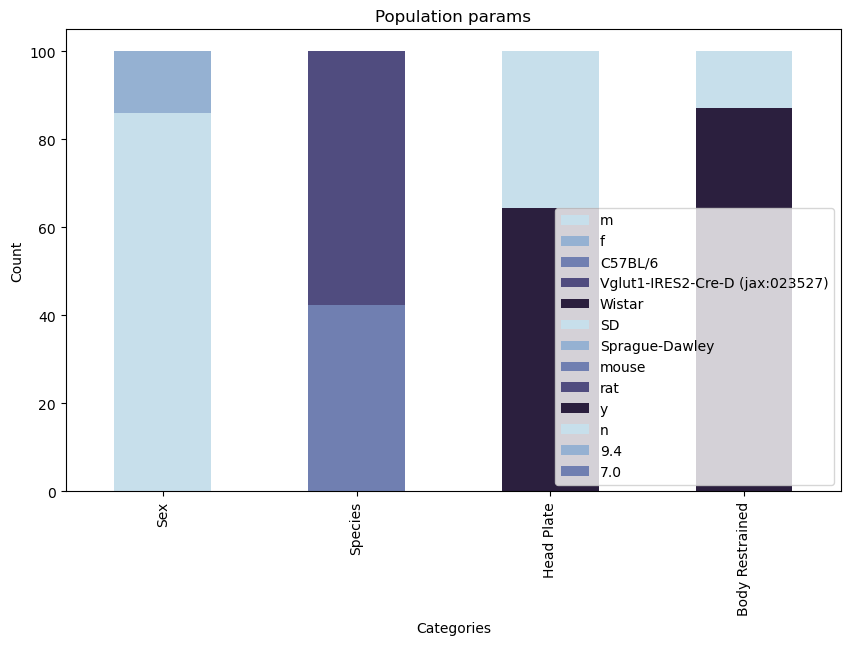

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

plot_params = metadata[["Sex", "Species", "Head Plate", "Body Restrained"]]    # Select the rows you want to plot
plot_params = plot_params.T                                               # Transpose the data for plotting

plot_params.plot(kind='bar', stacked=True, figsize=(10, 6))                    # Create a stacked bar plot


# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Population params')

# Show the plot
plt.savefig('/project/4180000.36/AwakeRodent/scratch/plots/fig1_population/barbox.svg', format='svg', dpi=1200)
plt.show()



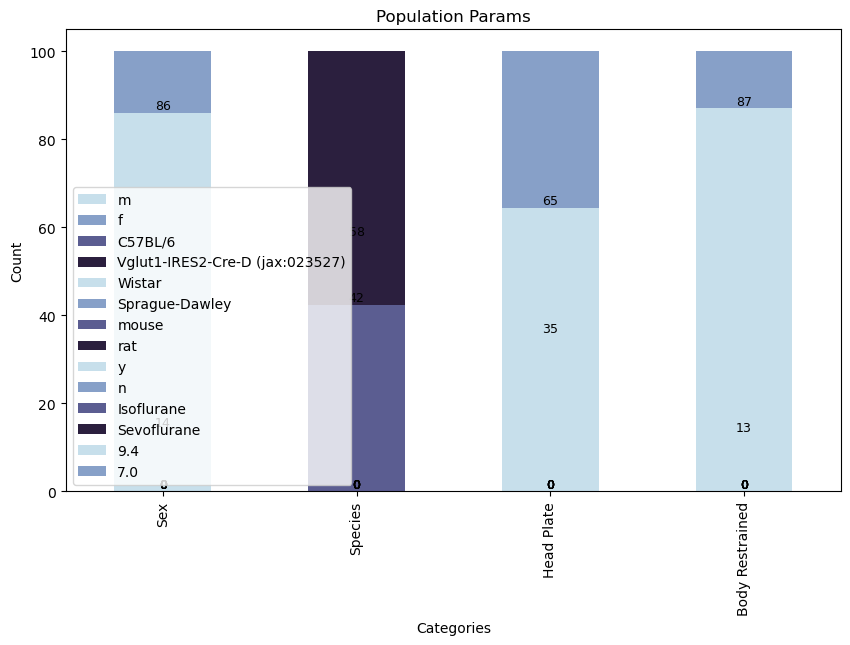

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'metadata' containing the data

# Select the rows you want to plot
plot_params = metadata[["Sex", "Species", "Head Plate", "Body Restrained"]]

# Transpose the data for plotting
plot_params = plot_params.T

# Create a stacked bar plot
ax = plot_params.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Population Params')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


In [ ]:
#https://github.com/grandjeanlab/MultiRat/blob/master/scripts/proj_manuscript.ipynb